# Mask R-CNN - Train FCN using MRCNN in Predict Mode 

In [1]:
# np_format = {}
# float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
# np_format['float'] = float_formatter
# np_format['int']   = int_formatter
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, math, io, time, gc, argparse, platform, pprint, pickle
import numpy as np
import tensorflow as tf
import keras
import keras.backend as KB
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True) 
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')

syst = platform.system()
# if syst == 'Windows':
#     dataset_path = "E:/git_projs/MRCNN3/train_newshapes/"
# elif syst == 'Linux':
#     dataset_path = "/home/kbardool/mrcnn3/train_newshapes/"
# else :
#     raise Error('unrecognized system ') 
    
import mrcnn.visualize as visualize
import mrcnn.utils     as utils
import mrcnn.prep_notebook as prep
from mrcnn.prep_notebook import build_fcn_training_pipeline_newshapes
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.datagen       import data_gen_simulate

Using TensorFlow backend.


Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path
 Init Image Class - Possible Object Choices:  {'building': 3, 'car': 3, 'cloud': 3, 'sun': 1, 'truck': 3, 'tree': 5, 'airplane': 3, 'person': 5}
 Init Image Class - Custom Color Keys      :  ['tree', 'ground', 'sun', 'cloud', 'sky', 'person']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - person_car_gap         :  10


In [4]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
input_parms = " --epochs           2 " 
input_parms +=" --dataset          newshapes2 "
input_parms +=" --steps_in_epoch   128 "    
input_parms +=" --val_steps        5 " 
input_parms +=" --last_epoch       0 "
input_parms +=" --batch_size       4 "
input_parms +=" --lr               0.0001 "
input_parms +=" --mrcnn_logs_dir   train_mrcnn "
input_parms +=" --fcn_logs_dir     train_fcn8L2 "
# input_parms +="--fcn_bce_loss_method    2  " 
# input_parms +="--fcn_bce_loss_class     3  "
input_parms +=" --fcn_losses        fcn_BCE_loss "
input_parms +=" --mrcnn_model      last "
input_parms +=" --fcn_model        init "
input_parms +=" --opt              adam "
input_parms +=" --fcn_arch         fcn8L2 " 
input_parms +=" --fcn_layers       all " 
input_parms +=" --sysout           screen "
input_parms +=" --scale_factor     1 " 
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     4
   coco_classes                   None
   dataset                        newshapes2
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 16
   sysout                         SCREEN
   val_steps      

In [5]:
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)

MODE IS: training

--> Execution started at: 03-23-2019 @ 13:42:54
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : trainfcn shapes:  newshapes2

   Arguments passed :
   --------------------
   batch_size                     4
   coco_classes                   None
   dataset                        newshapes2
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn
   mrcnn_model                    last
   n

    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190320T0000/mrcnn_0586.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     4
   coco_classes                   None
   dataset                        newshapes2
   epochs                         2
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      init
   last_epoch                     0
   lr                             0.0001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn
   mrcnn_model                    last
   new_log_folder               

    hm_indices                     :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 9, 128, 128)      KB.shape:(None, 9, 128, 128)   Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 128, 128)         KB.shape:(None, 128, 128)      Keras Tensor: False
    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (4, 9, 32, 3)         KB.shape:(4, 9, 32, 3)         Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (4, 9, 32, 3)         KB.shape:(4, 9, 32, 3)         Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    Normalize heatmap within each class !---------------

0      Tensor("block3_conv3/add:0", shape=(), dtype=float32)
1      Tensor("block4_conv1/add:0", shape=(), dtype=float32)
2      Tensor("block4_conv3/add:0", shape=(), dtype=float32)
3      Tensor("block5_conv2/add:0", shape=(), dtype=float32)
4      Tensor("fcn32_fc1/add:0", shape=(), dtype=float32)
5      Tensor("fcn32_deconv2D/add:0", shape=(), dtype=float32)
6      Tensor("fcn16_score_pool4/add:0", shape=(), dtype=float32)
7      Tensor("block1_conv2/add:0", shape=(), dtype=float32)
8      Tensor("block2_conv1/add:0", shape=(), dtype=float32)
9      Tensor("block3_conv2/add:0", shape=(), dtype=float32)
10      Tensor("block5_conv1/add:0", shape=(), dtype=float32)
11      Tensor("fcn8_score_pool3/add:0", shape=(), dtype=float32)
12      Tensor("block1_conv1/add:0", shape=(), dtype=float32)
13      Tensor("block2_conv2/add:0", shape=(), dtype=float32)
14      Tensor("block4_conv2/add:0", shape=(), dtype=float32)
15      Tensor("block5_conv3/add:0", shape=(), dtype=float32)
16      Te

# Define training datasets

In [6]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
# dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 10000, generator=True)
# dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  2500, generator=True)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_training_dataset_10000_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_train, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_validation_dataset_2500_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_val, outfile)

## -- OR --

## -- OR --
# dataset_path = 'E:\\git_projs\\mrcnn3\\train_newshapes_2'
dataset_path = '/home/kbardool/git_projs/mrcnn3/train_newshapes_2'
with open(os.path.join(dataset_path, 'newshapes2_training_dataset_15000_A.pkl'), 'rb') as outfile:
    dataset_train = pickle.load(outfile)
with open(os.path.join(dataset_path, 'newshapes2_validation_dataset_2500_A.pkl'), 'rb') as outfile:
    dataset_val = pickle.load(outfile)
    
## If we desire a generator, here it is:    
## train_generator = data_generator(dataset_train, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 
## val_generator = data_generator(dataset_val, mrcnn_model.config, batch_size=mrcnn_model.config.BATCH_SIZE,
#                                    shuffle = True, augment = False) 

In [8]:
class_names = dataset_train.class_names
# dataset_train.display_active_classes()
print(mrcnn_model.config.BATCH_SIZE, fcn_model.config.BATCH_SIZE)
print(' Len image_ids  : ', len(dataset_train.image_ids), len(dataset_val.image_ids))
print(' Type of dataset: ', type(dataset_train), type(dataset_val))
print(' Len image info : ', len(dataset_train.image_info), len(dataset_val.image_info))
print(dataset_train.class_from_source_map)
print(dataset_train.class_info)
# dataset_train.display_active_class_info()
# print(type(train_generator),type(val_generator))


4 4
 Len image_ids  :  15000 2500
 Type of dataset:  <class 'mrcnn.newshapes2.NewImagesDataset'> <class 'mrcnn.newshapes2.NewImagesDataset'>
 Len image info :  15000 2500
15000 2500
{'newshapes2.5': 5, 'newshapes2.7': 7, 'newshapes2.2': 2, 'newshapes2.6': 6, 'newshapes2.8': 8, 'newshapes2.1': 1, '.0': 0, 'newshapes2.4': 4, 'newshapes2.3': 3}
[{'source': '', 'id': 0, 'img_count': 0, 'name': 'BG', 'internal_id': 0, 'category': 'background'}, {'source': 'newshapes2', 'id': 1, 'img_count': 0, 'name': 'person', 'internal_id': 1, 'category': None}, {'source': 'newshapes2', 'id': 2, 'img_count': 0, 'name': 'car', 'internal_id': 2, 'category': None}, {'source': 'newshapes2', 'id': 3, 'img_count': 0, 'name': 'sun', 'internal_id': 3, 'category': None}, {'source': 'newshapes2', 'id': 4, 'img_count': 0, 'name': 'building', 'internal_id': 4, 'category': None}, {'source': 'newshapes2', 'id': 5, 'img_count': 0, 'name': 'tree', 'internal_id': 5, 'category': None}, {'source': 'newshapes2', 'id': 6, 'im

##  Display some images from training and val datasets

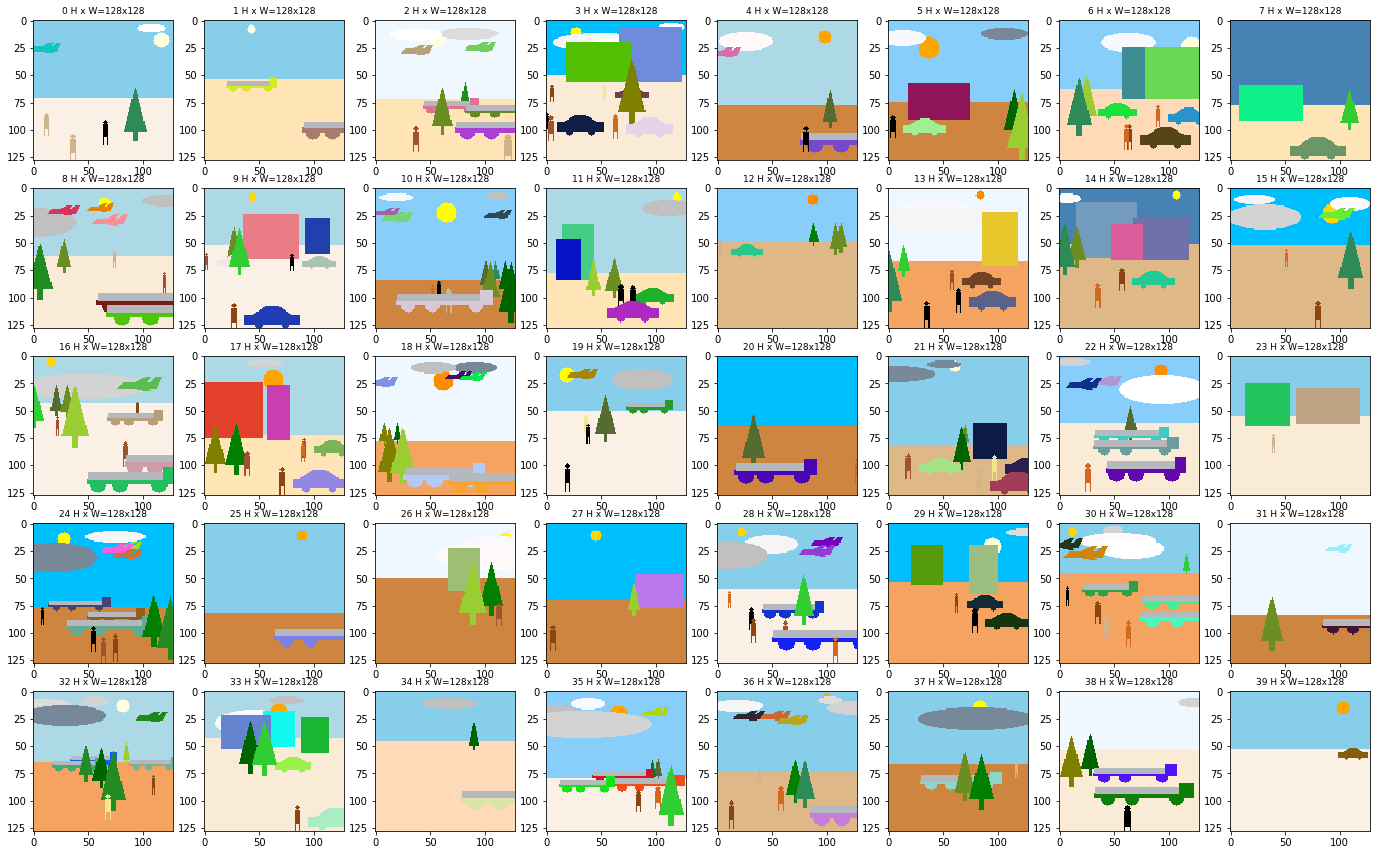

In [9]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_train, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

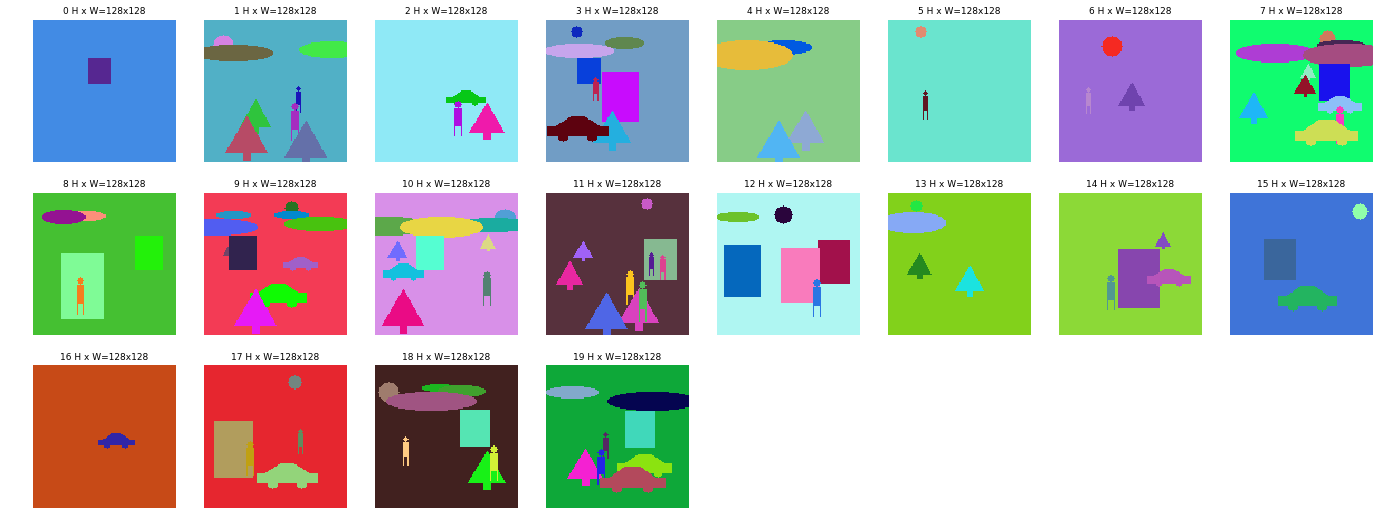

In [11]:
image_list = list(range(0,20))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_val, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

##  Print model layer and weight information

In [10]:
fcn_model.keras_model.summary()
tr_ly = fcn_model.get_trainable_layers()
for i in tr_ly:
    print(i.name)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_pr_hm_norm (InputLayer)   (None, 128, 128, 9)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 128, 128, 64) 5248        input_pr_hm_norm[0][0]           
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 128, 128, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 64, 64)   0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

block1_conv1
block1_conv2
block2_conv1
block2_conv2
block3_conv1
block3_conv2
block3_conv3
block4_conv1
block4_conv2
block4_conv3
block5_conv1
block5_conv2
block5_conv3
fcn32_fc1
fcn32_fc2
fcn32_deconv2D
fcn16_score2
fcn16_score_pool4
fcn16_upscore_pool4
fcn8_score_pool3
fcn8_heatmap


In [11]:
for layer in fcn_model.keras_model.layers:
    print('layer: ', layer.name)
    for weight in layer.weights:
        print('   mapped_weight_name : ',weight.name)
    if hasattr(layer, 'output'):
        print('   layer output ', type(layer),' shape: ',layer.output.shape )

layer:  input_pr_hm_norm
   layer output  <class 'keras.engine.topology.InputLayer'>  shape:  (?, 128, 128, 9)
layer:  block1_conv1
   mapped_weight_name :  block1_conv1/kernel:0
   mapped_weight_name :  block1_conv1/bias:0
   layer output  <class 'keras.layers.convolutional.Conv2D'>  shape:  (?, 128, 128, 64)
layer:  block1_conv2
   mapped_weight_name :  block1_conv2/kernel:0
   mapped_weight_name :  block1_conv2/bias:0
   layer output  <class 'keras.layers.convolutional.Conv2D'>  shape:  (?, 128, 128, 64)
layer:  block1_pool
   layer output  <class 'keras.layers.pooling.MaxPooling2D'>  shape:  (?, 64, 64, 64)
layer:  block2_conv1
   mapped_weight_name :  block2_conv1/kernel:0
   mapped_weight_name :  block2_conv1/bias:0
   layer output  <class 'keras.layers.convolutional.Conv2D'>  shape:  (?, 64, 64, 128)
layer:  block2_conv2
   mapped_weight_name :  block2_conv2/kernel:0
   mapped_weight_name :  block2_conv2/bias:0
   layer output  <class 'keras.layers.convolutional.Conv2D'>  shape:

In [ ]:
# model.keras_model.losses
# print(model.keras_model.metrics_names)
# model.keras_model.summary(line_length=132, positions=[0.30,0.75, .83, 1. ])

## Display Images

### Load a specific image using image_id  with Ground Truth bounding boxes and masks

In [ ]:
# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [417])
# visualize.display_training_batch(dataset_train, train_batch_x)


image id :  646
 Image_id    :  646  Reference:  [('sun', (17, 87, 183), (99, 10, 5, 5))] Coco Id: 646
 Image meta  :  [646 128 128   3   0   0 128 128]
 Class ids   :  (1,)    [3]
 Class Names :  ['sun']


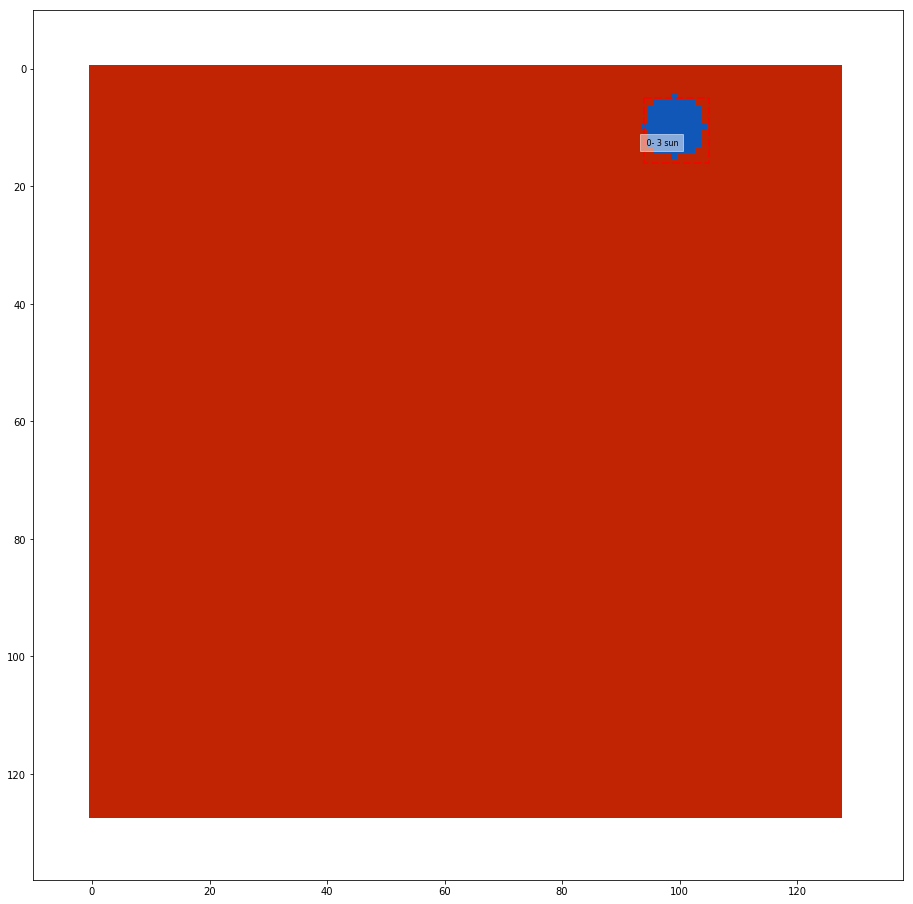

[646 128 128   3   0   0 128 128   1   1   1   1   1   1   1]


In [6]:
IMAGE_IDS = [646]
# train_batch_x, train_batch_y = next(train_generator)
train_batch_x, train_batch_y = data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, train_batch_x)
print(train_batch_x[1][0])

### Get training batch using generator and display 

In [ ]:
train_batch_x, train_batch_y = next(train_generator)
display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x:
#     print(type(i), i.shape)

# Call `train_in_batches()`

## `fcn_model.config`

In [12]:
# mrcnn_model.config.display()
fcn_model.config.display()


FCN Configuration Parameters:
-----------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_MOMENTUM                 0.9
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CHECKPOINT_PERIOD              1
DETECTION_MAX_INSTANCES        64
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            64
DIR_DATASET                    /home/kbardool/MLDatasets/newshapes2
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /home/kbardool/models_newshapes2
EARLY_STOP_MIN_DELTA           1e-07
EARLY_STOP_PATIENCE            500
EPOCHS_TO_RUN                  2
FCN_BCE_LOSS_CLASS             0
FCN_BCE_LOSS_METHOD            1
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 4
IMAGE_BUFFER      

In [15]:
fcn_model.config.LAST_EPOCH_RAN  =  0
fcn_model.config.EPOCHS_TO_RUN   =  20
fcn_model.config.REDUCE_LR_PATIENCE = 200
# fcn_model.config.LEARNING_RATE   = 1.0e-6
# fcn_model.config.STEPS_PER_EPOCH = 10
# fcn_model.config.SYSOUT = 'screen'

print('    last epoch ran  : ',fcn_model.config.LAST_EPOCH_RAN)
print('    epochs to run   : ',fcn_model.config.EPOCHS_TO_RUN)
print('    steps per epoch : ',fcn_model.config.STEPS_PER_EPOCH)
print('    validation steps: ',fcn_model.config.VALIDATION_STEPS)
print('    learning rate   : ',fcn_model.config.LEARNING_RATE)
print('    momentum        : ',fcn_model.config.LEARNING_MOMENTUM)
print('    weight decay    : ',fcn_model.config.WEIGHT_DECAY)

    last epoch ran  :  0
    epochs to run   :  20
    steps per epoch :  16
    validation steps:  5
    learning rate   :  0.0001
    momentum        :  0.9
    weight decay    :  1e-06


## Call to `train_in_batches()`

In [16]:
##----------------------------------------------------------------------------------------------
## Train the FCN only 
## Passing layers="heads" freezes all layers except the head
## layers. You can also pass a regular expression to select
## which layers to train by name pattern.
## Layers :
##----------------------------------------------------------------------------------------------            
train_layers = ['block1+']   # args.fcn_layers
train_layers = ['all']   # args.fcn_layers
loss_names   = ['fcn_BCE_loss']
fcn_model.epoch = fcn_model.config.LAST_EPOCH_RAN

fcn_model.train_in_batches(
            mrcnn_model,    
            dataset_train,
            dataset_val, 
            layers = train_layers,
            losses = loss_names,
            shuffle = False)


['all']
['.*']
layers regex : .*

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   TRAIN 
   2  block1_conv2           (Conv2D              )   TRAIN 
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (Conv2D              )   TRAIN 
   8  block3_conv2           (Conv2D              )   TRAIN 
   9  block3_conv3           (Conv2D              )   TRAIN 
  10  block3_pool            (MaxPooling2D        )   ............................no weights to train ]
  11  block4_conv1        

 summary merge all
 
Training Start Parameters:
--------------------------
Starting at epoch     0 of 20 epochs.
Steps per epochs      16 
Last epoch completed  0 
Batch size            4 
Learning Rate         0.0001 
Momentum              0.9 
Weight Decay:         1e-06 
VALIDATION_STEPS      5 
REDUCE_LR_FACTOR      0.5 
REDUCE_LR_COOLDOWN    50 
REDUCE_LR_PATIENCE    200 
MIN_LR                1e-10 
EARLY_STOP_PATIENCE   500 
Checkpoint Path:      /home/kbardool/models_newshapes2/train_fcn8L2/fcn20190323T1343/fcn_{epoch:04d}.h5 
Epoch 1/20
16/16 [==============================] - 39s 2s/step - loss: 0.0379 - fcn_BCE_loss: 0.0290 - val_loss: 0.0413 - val_fcn_BCE_loss: 0.0325

Epoch 00001: val_loss improved from inf to 0.0413440, saving model to /home/kbardool/models_newshapes2/train_fcn8L2/fcn20190323T1343/fcn_0001.h5
Epoch 2/20
16/16 [==============================] - 22s 1s/step - loss: 0.0397 - fcn_BCE_loss: 0.0308 - val_loss: 0.0369 - val_fcn_BCE_loss: 0.0281

Epoch 00002: val

In [ ]:
pp.pprint(fcn_model.keras_model._feed_inputs)
pp.pprint(fcn_model.keras_model._feed_targets)
pp.pprint(fcn_model.keras_model._feed_loss_fns)
pp.pprint(fcn_model.keras_model._feed_outputs)
pp.pprint(fcn_model.keras_model._feed_sample_weights)
pp.pprint(fcn_model.keras_model.updates)

import keras.backend as KB
fcn_hm_layer = fcn_model.keras_model.layers[32]
fcn_sp3_layer = fcn_model.keras_model.layers[30]
pp.pprint(fcn_hm_layer.__dict__ )
pp.pprint(fcn_sp3_layer.__dict__)

sess = KB.get_session()
with sess.as_default():
    wght1 = fcn_hm_layer._trainable_weights[0].eval()
    wght2 = fcn_sp3_layer._trainable_weights[0].eval()

print(wght1.shape, wght2.shape)
print(wght1)